In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(lepping_db.all()), mask='/data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100)

01/15/2019 21:17:16 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-music_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/15/2019 21:17:19 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-music_run-4_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/15/2019 21:17:22 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-nonmusic_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/15/2019 21:17:25 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-nonmusic_run-1_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/e

In [6]:
htfa.load_state('data/lepping_2017_k100_n1000_01152019_151317')

In [8]:
def subject_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [9]:
def task_labeler(block):
    if block.task == 'negative_music':
        task = 'Negative music'
    elif block.task == 'positive_music':
        task = 'Positive music'
    elif block.task == 'negative_nonmusic':
        task = 'Negative sounds'
    elif block.task == 'positive_nonmusic':
        task = 'Positive sounds'
    else:
        task = block.task.capitalize()
    return task

In [10]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

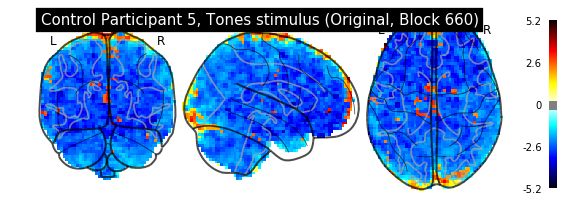

01/15/2019 21:51:03 Reconstruction Error (Frobenius Norm): 6.07134094e+02 out of 1.40128882e+03


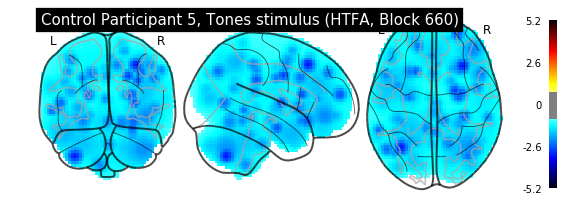

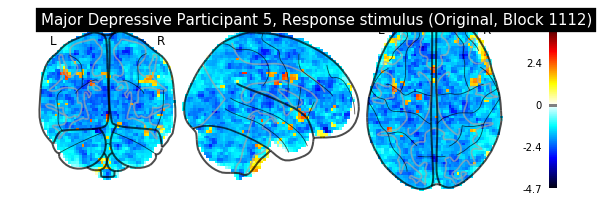

01/15/2019 21:51:07 Reconstruction Error (Frobenius Norm): 1.74713531e+02 out of 2.56901917e+02


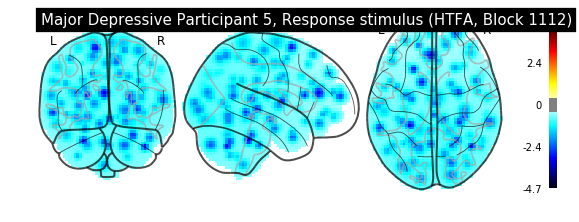

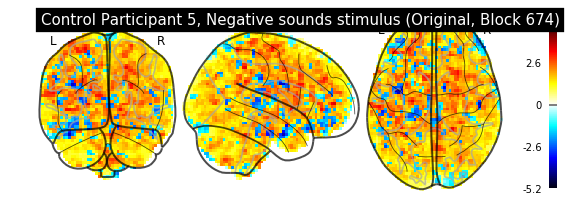

01/15/2019 21:51:11 Reconstruction Error (Frobenius Norm): 6.13581604e+02 out of 8.37823975e+02


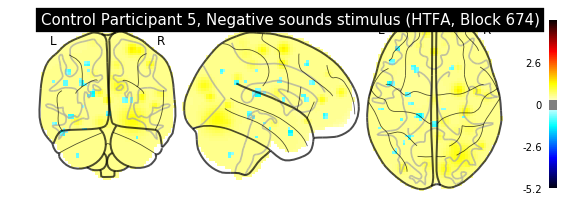

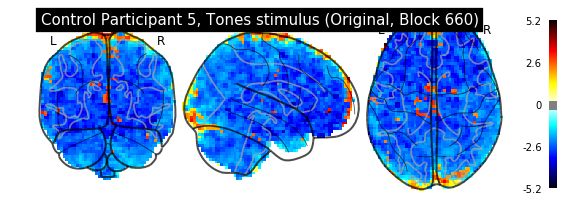

01/15/2019 21:51:16 Reconstruction Error (Frobenius Norm): 6.07134094e+02 out of 1.40128882e+03


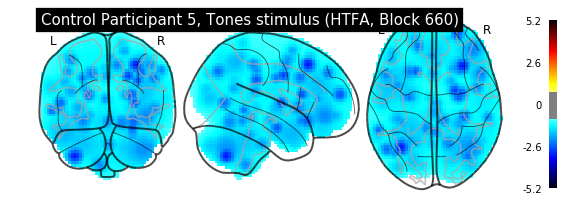

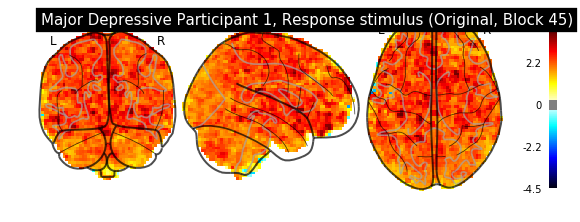

01/15/2019 21:51:20 Reconstruction Error (Frobenius Norm): 1.77621765e+02 out of 3.72132599e+02


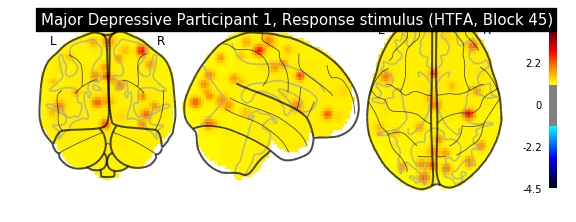

In [11]:
for b in np.random.choice(range(htfa.num_blocks), 5):
    htfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    htfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

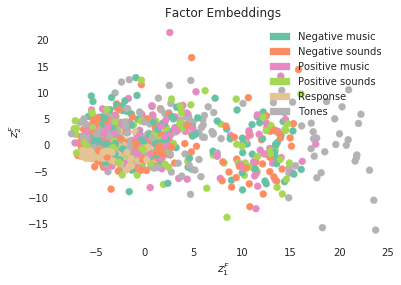

In [12]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=task_labeler, embedding='PCA')

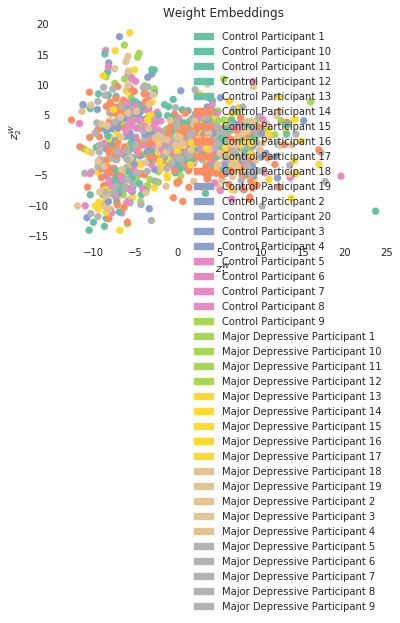

In [13]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=subject_labeler, embedding='PCA')

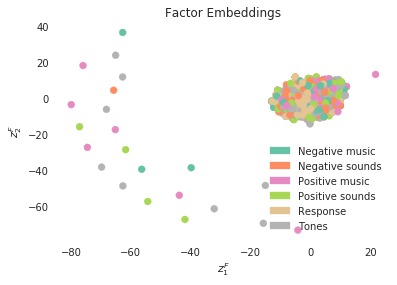

In [14]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=task_labeler, embedding='TSNE')

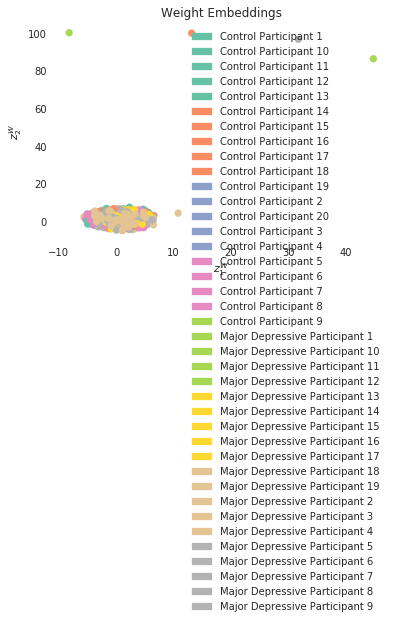

In [15]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=subject_labeler, embedding='TSNE')

In [16]:
htfa.average_reconstruction_error()

01/15/2019 21:58:12 Average reconstruction error (MSE): 7.39753682e-01
01/15/2019 21:58:12 Average data norm (Euclidean): 9.62533086e-01
01/15/2019 21:58:12 Percent average reconstruction error: 0.300415


(0.7397536818023802, 0.9625330856146269, 0.0030041542763438144)

In [17]:
def condition_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

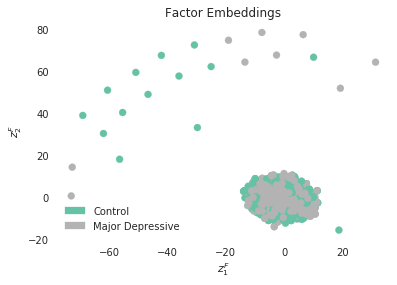

In [18]:
htfa.scatter_factor_embedding(labeler=condition_labeler, embedding='TSNE')